In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import numpy as np

#폰트 경로 가져오기
font_path = 'C:\Windows\Fonts\SGL.ttf' #삼성고딕체
 
# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#폰트 설정하기
mpl.rc('font',family=font_name)

In [2]:
workdir = ""
file_path = '{}/CaCT_SCORE.dta'.format(workdir)

data = pd.read_stata(file_path)

# data

# 조건별 그룹 설정

### 정상, 기타 결과 그룹 분리

In [3]:
GRP = 'CACT'

In [4]:
# data.loc[(data['BL3113'] >= 240) | (data['BL314201'] >= 160 ) | (data['BL3141'] >= 200 ) | (data['BL3142'] < 40 ) | (data['TRT_MED_HYPERLIPCDWEMIA'] == '1'), GRP] = '이상지질혈증'
# # data.loc[(data['BL3164'] >= 6.5) | (data['TRT_MED_DIABETES'] == '1'), GRP] = '당뇨'
# data['DYSLIPCDW'].fillna('정상',inplace=True)

In [5]:
data.loc[data['GEND_CD'] == 'M', 'GENDER'] = '남'
data.loc[data['GEND_CD'] == 'F', 'GENDER'] = '여'

In [6]:
data.loc[ data['AGE'] < 30                      ,'AGEGRP'] = '0~29세'
data.loc[(data['AGE'] > 29) & (data['AGE'] < 40),'AGEGRP'] = '30~39세'
data.loc[(data['AGE'] > 39) & (data['AGE'] < 50),'AGEGRP'] = '40~49세'
data.loc[(data['AGE'] > 49) & (data['AGE'] < 60),'AGEGRP'] = '50~59세'
data.loc[(data['AGE'] > 59) & (data['AGE'] < 70),'AGEGRP'] = '60~69세'
data.loc[ data['AGE'] > 69                      ,'AGEGRP'] = '70세 이상'
# data.head(100)

In [7]:
data.loc[ data['AJ_130'] == 0                            ,'CACT'] = '01_No calcification'
data.loc[(data['AJ_130'] > 0)    & (data['AJ_130'] < 10) ,'CACT'] = '02_Minimal calcification'
data.loc[(data['AJ_130'] >= 10)  & (data['AJ_130'] < 100),'CACT'] = '03_Mild calcification'
data.loc[(data['AJ_130'] >= 100) & (data['AJ_130'] < 400),'CACT'] = '04_Moderate calcification'
data.loc[ data['AJ_130'] >= 400                          ,'CACT'] = '05_Severe calcification'

# data

### 특정 그룹 별도 저장

In [8]:
data_m = data.drop(data.loc[data['GEND_CD']=='F'].index)
data_f = data.drop(data.loc[data['GEND_CD']=='M'].index)

## pivot table create

In [9]:
cact_cnt_m = data_m.pivot_table(
                             index=[GRP,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['CDW']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )

# cact_cnt_m
# cact_per_m = round(cact_cnt_m.div(cact_cnt_m.iloc[-1,-1], axis=0).astype(float)*100,1) # total value
# each column total value percentile
cact_per_m = round(cact_cnt_m.div(cact_cnt_m.iloc[-1], axis=1).astype(float)*100,1)

# cact_per_m

cact_agegrp_m = pd.DataFrame()

for i in range(len(cact_cnt_m.columns)):
    if i == 0:
        cact_agegrp_m = pd.concat(
                                [
                                 cact_cnt_m.iloc[:,i]
                                ,cact_per_m.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        cact_agegrp_m = pd.concat(
                                [
                                 cact_agegrp_m
                                ,cact_cnt_m.iloc[:,i]
                                ,cact_per_m.iloc[:,i]
                                ]
                            ,axis=1
        )
        
# cact_agegrp_m

In [10]:
cact_cnt_f = data_f.pivot_table(
                             index=[GRP,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['CDW']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )
# empty group value insert with multi index
cact_cnt_f['CDW','0~29세'] = [0, 0, 0, 0, 0, 0]
cact_cnt_f = cact_cnt_f.sort_index(axis=1)
# cact_cnt_f
# cact_per_f = round(cact_cnt_f.div(cact_cnt_f.iloc[-1,-1], axis=0).astype(float)*100,1) # total value
# each column total value percentile
cact_per_f = round(cact_cnt_f.div(cact_cnt_f.iloc[-1], axis=1).astype(float)*100,1)

# empty group value insert with multi index
cact_per_f['CDW','0~29세'] = [0, 0, 0, 0, 0, 0]
cact_per_f = cact_per_f.sort_index(axis=1)

# cact_per_f

cact_agegrp_f = pd.DataFrame()

for i in range(len(cact_cnt_f.columns)):
    if i == 0:
        cact_agegrp_f = pd.concat(
                                [
                                 cact_cnt_f.iloc[:,i]
                                ,cact_per_f.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        cact_agegrp_f = pd.concat(
                                [
                                 cact_agegrp_f
                                ,cact_cnt_f.iloc[:,i]
                                ,cact_per_f.iloc[:,i]
                                ]
                            ,axis=1
        )
        
# cact_agegrp_f

In [11]:
cact_agegrp = pd.concat([cact_agegrp_m.iloc[:-1,:], cact_agegrp_f.iloc[:-1,:]],axis=0)
# cact_agegrp = pd.concat([cact_agegrp_m, cact_agegrp_f],axis=0)
cact_agegrp_label = []

for i in range(len(cact_agegrp.columns)):
    cact_agegrp_label.append(cact_agegrp.columns[i][1])
    
cact_agegrp.columns = cact_agegrp_label
# cact_agegrp.set_index(cact_agegrp.index.names,inplace=True)
cact_agegrp = cact_agegrp.sort_index()

labels = []
for i in range(len(cact_per_m.columns)-1):
    labels.append(cact_per_m.columns[i][1])
    
# cact_agegrp

In [12]:
cact_cnt_t = data.pivot_table(
                             index=[GRP]#,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['CDW']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )

# total value percentile
cact_per_t = round(cact_cnt_t.div(cact_cnt_t.iloc[-1,-1], axis=0).astype(float)*100,1)

cact_per_t

cact_agegrp_t = pd.DataFrame()

for i in range(len(cact_cnt_t.columns)):
    if i == 0:
        cact_agegrp_t = pd.concat(
                                [
                                 cact_cnt_t.iloc[:,i]
                                ,cact_per_t.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        cact_agegrp_t = pd.concat(
                                [
                                 cact_agegrp_t
                                ,cact_cnt_t.iloc[:,i]
                                ,cact_per_t.iloc[:,i]
                                ]
                            ,axis=1
        )

# cact_agegrp_t

# Stacked Barchart create

C:\Users\smcljy\AppData\Local\Temp/ipykernel_21340/301342636.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


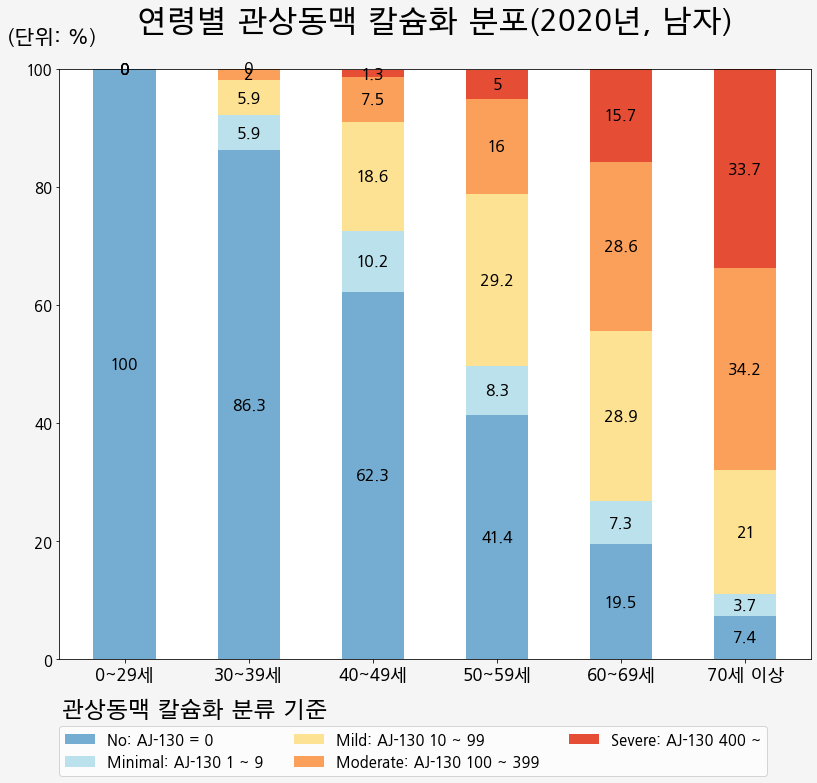

In [15]:
value01 = cact_per_m.iloc[0,:-1].to_list()
value02 = cact_per_m.iloc[1,:-1].to_list()
value03 = cact_per_m.iloc[2,:-1].to_list()
value04 = cact_per_m.iloc[3,:-1].to_list()
value05 = cact_per_m.iloc[4,:-1].to_list()

wCDWth = 0.5       # the wCDWth of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 11))#,linewCDWth=2) # 캔버스 배경 사이즈 설정
fig.set_facecolor('whitesmoke') ## 캔버스 배경색 설정

rects1 = ax.bar(labels, value01, wCDWth, label='No: AJ-130 = 0'
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[5])
rects2 = ax.bar(labels, value02, wCDWth, label='Minimal: AJ-130 1 ~ 9'
                  ,bottom=value01
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[4])
rects3 = ax.bar(labels, value03, wCDWth, label='Mild: AJ-130 10 ~ 99'
                  ,bottom=[value01[i]+value02[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[2])
rects4 = ax.bar(labels, value04, wCDWth, label='Moderate: AJ-130 100 ~ 399'
                  ,bottom=[value01[i]+value02[i]+value03[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[1])
rects5 = ax.bar(labels, value05, wCDWth, label='Severe: AJ-130 400 ~'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[0])

ax.set_title('연령별 관상동맥 칼슘화 분포(2020년, 남자)\n',fontsize=30)
ax.set_ylabel(
                '(단위: %)\n' # 표시값
                 ,labelpad=-70 # 여백값 설정
                ,fontsize=20 # 글씨크기 설정
                ,rotation=0 # 회전값 조정
#                 ,ha='center' # 위치조정
                ,loc='top' # 위치조정, ha와 동시에 사용은 불가함.
            )
ax.yaxis.set_tick_params(labelsize=15) # y축 표시값 글씨크기 조정

ax.set_xticklabels(
                   labels
                  , fontsize=17
                  )

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(rects1, label_type='center',fontsize=16)
ax.bar_label(rects2, label_type='center',fontsize=16)
ax.bar_label(rects3, label_type='center',fontsize=16)
ax.bar_label(rects4, label_type='center',fontsize=16)
ax.bar_label(rects5, label_type='center',fontsize=16)
# ax.bar_label(rects6, label_type='center',fontsize=16)

plt.text(-0.5, -9.5,  '관상동맥 칼슘화 분류 기준', fontsize=22)
lg = ax.legend(bbox_to_anchor=(-0.01,-0.21)
          ,ncol=3  ,loc='lower left' ,fontsize=15
          )

fig.tight_layout()

plt.savefig("{}/03_01관상동맥칼슘화_01남자분포.png".format(workdir[:-5])
            ,bbox_extra_artists=(lg,)
            ,bbox_inches='tight'
            )

plt.show()

C:\Users\smcljy\AppData\Local\Temp/ipykernel_21340/2233698674.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


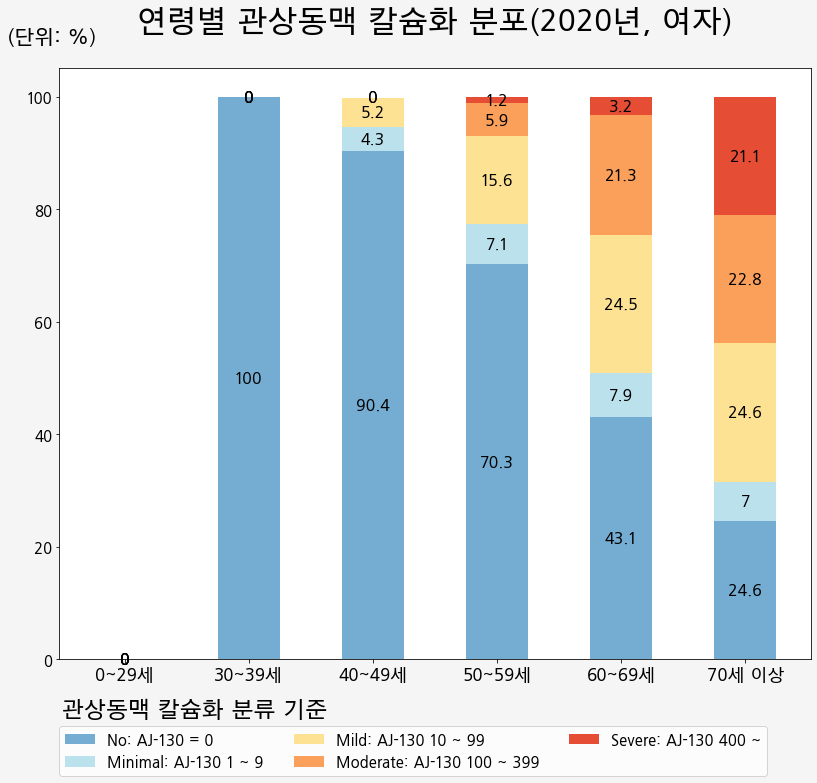

In [16]:
value01 = cact_per_f.iloc[0,:-1].to_list()
value02 = cact_per_f.iloc[1,:-1].to_list()
value03 = cact_per_f.iloc[2,:-1].to_list()
value04 = cact_per_f.iloc[3,:-1].to_list()
value05 = cact_per_f.iloc[4,:-1].to_list()

wCDWth = 0.5       # the wCDWth of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 11))#,linewCDWth=2) # 캔버스 배경 사이즈 설정
fig.set_facecolor('whitesmoke') ## 캔버스 배경색 설정

rects1 = ax.bar(labels, value01, wCDWth, label='No: AJ-130 = 0'
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[5])
rects2 = ax.bar(labels, value02, wCDWth, label='Minimal: AJ-130 1 ~ 9'
                  ,bottom=value01
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[4])
rects3 = ax.bar(labels, value03, wCDWth, label='Mild: AJ-130 10 ~ 99'
                  ,bottom=[value01[i]+value02[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[2])
rects4 = ax.bar(labels, value04, wCDWth, label='Moderate: AJ-130 100 ~ 399'
                  ,bottom=[value01[i]+value02[i]+value03[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[1])
rects5 = ax.bar(labels, value05, wCDWth, label='Severe: AJ-130 400 ~'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[0])

ax.set_title('연령별 관상동맥 칼슘화 분포(2020년, 여자)\n',fontsize=30)
ax.set_ylabel(
                '(단위: %)\n' # 표시값
                 ,labelpad=-70 # 여백값 설정
                ,fontsize=20 # 글씨크기 설정
                ,rotation=0 # 회전값 조정
#                 ,ha='center' # 위치조정
                ,loc='top' # 위치조정, ha와 동시에 사용은 불가함.
            )
ax.yaxis.set_tick_params(labelsize=15) # y축 표시값 글씨크기 조정

ax.set_xticklabels(
                   labels
                  , fontsize=17
                  )

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(rects1, label_type='center',fontsize=16)
ax.bar_label(rects2, label_type='center',fontsize=16)
ax.bar_label(rects3, label_type='center',fontsize=16)
ax.bar_label(rects4, label_type='center',fontsize=16)
ax.bar_label(rects5, label_type='center',fontsize=16)
# ax.bar_label(rects6, label_type='center',fontsize=16)

plt.text(-0.5, -10,  '관상동맥 칼슘화 분류 기준', fontsize=22)
lg = ax.legend(bbox_to_anchor=(-0.01,-0.21)
          ,ncol=3  ,loc='lower left' ,fontsize=15
          )

fig.tight_layout()

plt.savefig("{}/03_01관상동맥칼슘화_01여자분포.png".format(workdir[:-5])
            ,bbox_extra_artists=(lg,)
            ,bbox_inches='tight'
            )

plt.show()

# data merge, export

In [ ]:
cact_agegrp_t.to_excel('{}/03_01관상동맥칼슘화.xlsx'.format(workdir[:-5]),sheet_name="분포")
with pd.ExcelWriter('{}/03_01관상동맥칼슘화.xlsx'.format(workdir[:-5]), mode='a',engine='openpyxl') as writer:
    cact_agegrp.to_excel(writer,sheet_name="연령별분포")